In [ ]:
'''Project 1:- Customer Churn Prediction
   Goal: Predict whether a customer will leave a subscription-based service.
   Dataset: Kaggle - Customer Churn.
   Techniques: Logistic Regression, Random Forest.
   Skills: Handling imbalanced datasets, classification metrics.'''

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('telecom_churn.csv')
df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [3]:
df.shape

(3333, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [11]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [21]:
sizes = df['Churn'].value_counts()
sizes

Churn
0    2850
1     483
Name: count, dtype: int64

In [157]:
# Random under-sampleing
df2 = df.loc[df['Churn']==0].sample(n=483).copy()
# All Churned Customers
df3 = df.loc[df['Churn']==1].copy()

# Concat all customers, with new index on raws
df4 = pd.concat([df2,df3], ignore_index=True)

# Shuffle raws randomly
df4 = df4.sample(frac=1)

# Reset index of every raws
df4.reset_index(drop=True, inplace=True)
df4

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,121,1,0,0.00,1,150.7,105,43.0,9.87,9.2
1,0,95,1,0,0.00,0,160.0,133,46.0,10.77,9.1
2,1,133,1,0,0.00,0,117.8,100,37.0,9.96,11.8
3,1,88,1,0,0.00,5,131.5,99,38.0,8.74,7.9
4,0,59,1,1,1.84,1,133.1,114,60.4,11.06,6.8
...,...,...,...,...,...,...,...,...,...,...,...
961,0,132,1,0,0.32,1,163.2,80,45.2,8.38,6.2
962,0,126,0,1,2.59,1,129.3,123,62.9,8.83,9.6
963,0,138,1,0,0.00,3,241.8,93,56.0,8.53,11.8
964,1,109,1,1,3.32,1,166.9,85,81.2,11.06,12.3


In [233]:
sizes1 = df4['Churn'].value_counts()
sizes1

Churn
0    483
1    483
Name: count, dtype: int64

In [158]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


([<matplotlib.patches.Wedge at 0x13f687310>,
 [Text(-0.48366775647663257, -0.9879602731612547, 'Churn'),
  Text(0.48366780272639076, 0.9879602505191316, 'Not Churn')],
 [Text(-0.26381877625998135, -0.5388874217243207, '85.5%'),
  Text(0.2638188014871222, 0.5388874093740718, '14.5%')])

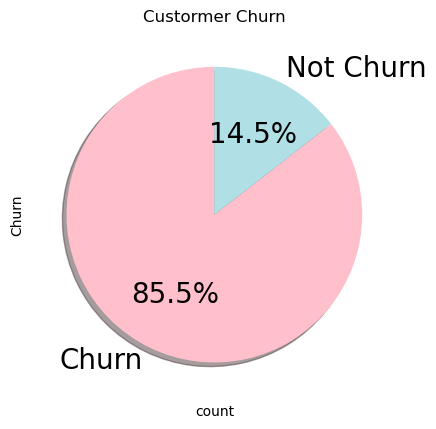

In [159]:
plt.xlabel('count')
plt.ylabel('Churn')
plt.title('Custormer Churn')

plt.pie(sizes,labels=['Churn', 'Not Churn'], colors=['pink','powderblue'], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})

Text(0.5, 1.0, 'Count of Contract Renewal')

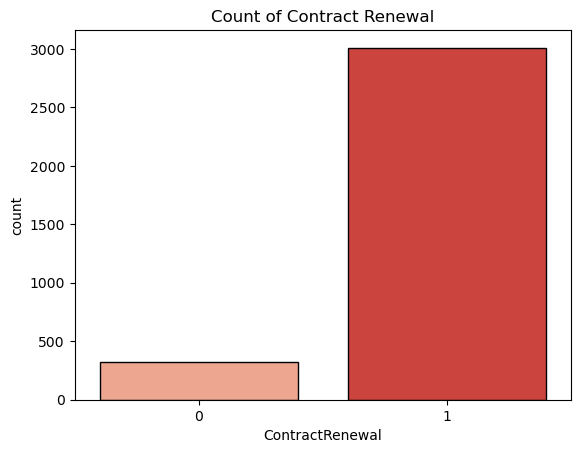

In [48]:
sns.countplot(data = df , x = "ContractRenewal" , palette="Reds", edgecolor='k')
plt.title("Count of Contract Renewal")

Text(0.5, 1.0, 'Count of Data Plan')

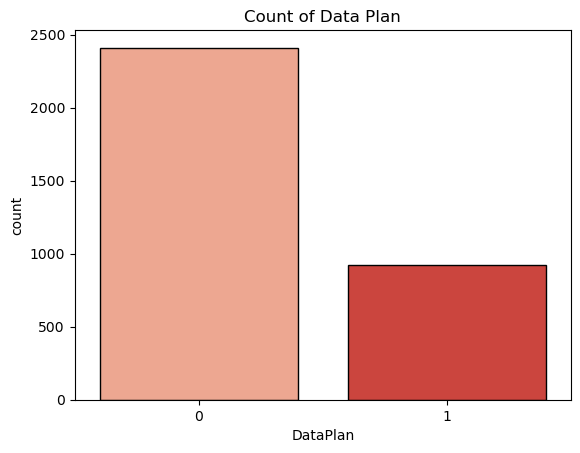

In [49]:
sns.countplot(data = df , x = "DataPlan" , palette="Reds", edgecolor='k')
plt.title("Count of Data Plan")

Text(0.5, 1.0, 'Count of Customer service calls')

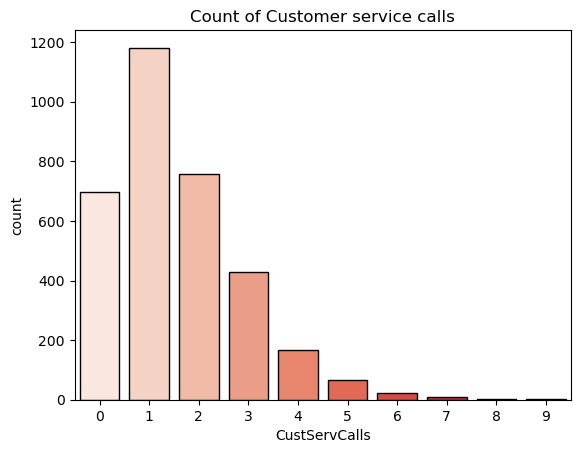

In [50]:
sns.countplot(data = df , x = "CustServCalls" , palette="Reds", edgecolor='k')
plt.title("Count of Customer service calls")

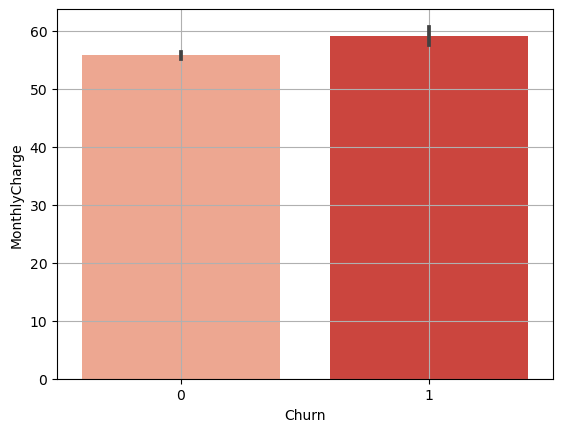

In [58]:
sns.barplot(data = df , y = "MonthlyCharge" , x = "Churn" , palette="Reds")
plt.grid()

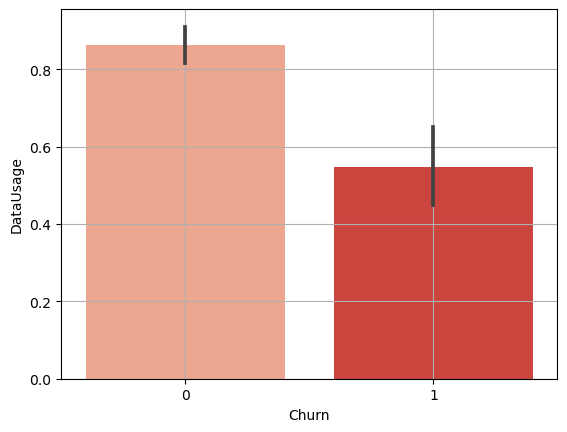

In [59]:
sns.barplot(data = df , y = "DataUsage" , x = "Churn" , palette="Reds")
plt.grid()

In [62]:
scaler = StandardScaler().fit(df.drop("Churn",axis=1))

In [63]:
scaler

StandardScaler()

In [161]:
x = scaler.transform(df4.drop('Churn', axis='columns'))
y = df4.Churn

In [162]:
len(x)

966

In [163]:
len(y)

966

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 45)

In [203]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 5.40700771e-01,  4.83297675e-01, -5.56846046e-01, ...,
         8.85877991e-02,  2.82027224e+00,  2.42811032e-01],
       [ 5.15211669e-01,  4.83297675e-01, -5.56846046e-01, ...,
        -9.54817948e-01,  1.28222705e-01, -3.01305945e-03],
       [ 2.34831548e-01,  4.83297675e-01, -5.56846046e-01, ...,
         8.25109503e-01,  1.93329638e+00, -3.54190333e-01],
       ...,
       [-1.70234020e+00,  4.83297675e-01,  1.79582850e+00, ...,
         1.03992833e+00, -1.70408268e+00,  1.19098967e+00],
       [ 8.18969369e-02,  4.83297675e-01, -5.56846046e-01, ...,
        -1.20032518e+00, -3.17070504e+00,  6.64223760e-01],
       [ 5.40700771e-01,  4.83297675e-01, -5.56846046e-01, ...,
        -8.25926650e-01, -9.74115043e-02,  9.80283306e-01]])

In [204]:
x_test = scaler.fit_transform(x_test)
x_test

array([[-2.41470870e+00, -2.50000000e+00, -5.85314097e-01, ...,
        -1.26718107e+00, -1.44404627e+00, -4.06505974e-01],
       [-1.44084229e-01,  4.00000000e-01, -5.85314097e-01, ...,
        -1.01087140e-03, -8.02850635e-01,  3.59738631e-01],
       [-3.90891237e-01,  4.00000000e-01, -5.85314097e-01, ...,
        -6.49689200e-01,  1.52682684e+00,  1.47079331e+00],
       ...,
       [ 3.98891189e-01,  4.00000000e-01, -5.85314097e-01, ...,
        -4.68807743e-01, -1.40129989e+00, -1.01950166e+00],
       [-1.03258946e+00,  4.00000000e-01, -5.85314097e-01, ...,
        -3.12875452e-01,  1.26607395e+00, -3.89291893e+00],
       [-2.18126332e-01, -2.50000000e+00,  1.70848439e+00, ...,
         4.26501699e-02, -4.95076731e-01, -1.00008132e-01]])

In [205]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10)

In [206]:
lr.fit(x_train,y_train)

LogisticRegression(C=10)

In [207]:
lr.score(x_test,y_test)

0.8068965517241379

In [208]:
lr.score(x_train,y_train)

0.772189349112426

In [209]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [210]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [211]:
rf.score(x_train,y_train)

1.0

In [212]:
rf.score(x_test,y_test)

0.8862068965517241

In [213]:
pred_class = lr.predict(x_test)

In [227]:
y_pred = rf.predict(x_test)

In [215]:
from sklearn.metrics import mean_squared_error

# Evaluate the model by calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.11379310344827587


In [116]:
y_pred1 = lr.predict(x_test)

In [154]:
from sklearn.metrics import accuracy_score   
score = accuracy_score(y_test, y_pred)  
print(score)  

0.936


In [221]:
len(y_pred)

290

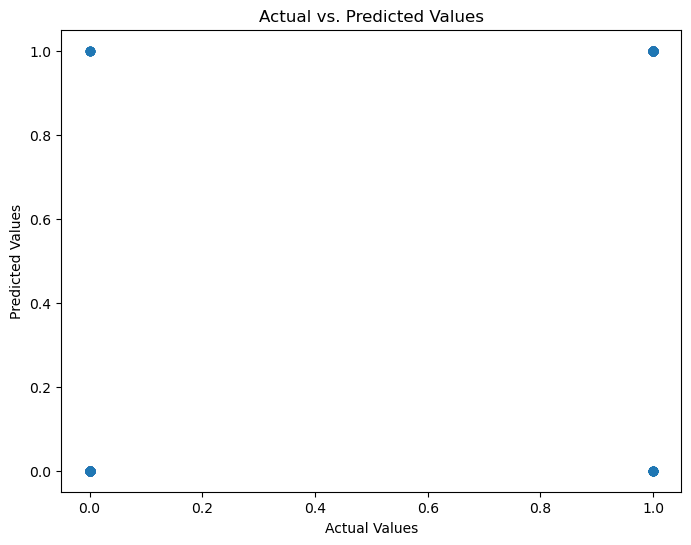

In [228]:
# Scatter Plot for Predicted vs. Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [229]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  10],
       [ 23, 122]])

Text(95.72222222222221, 0.5, 'Truth')

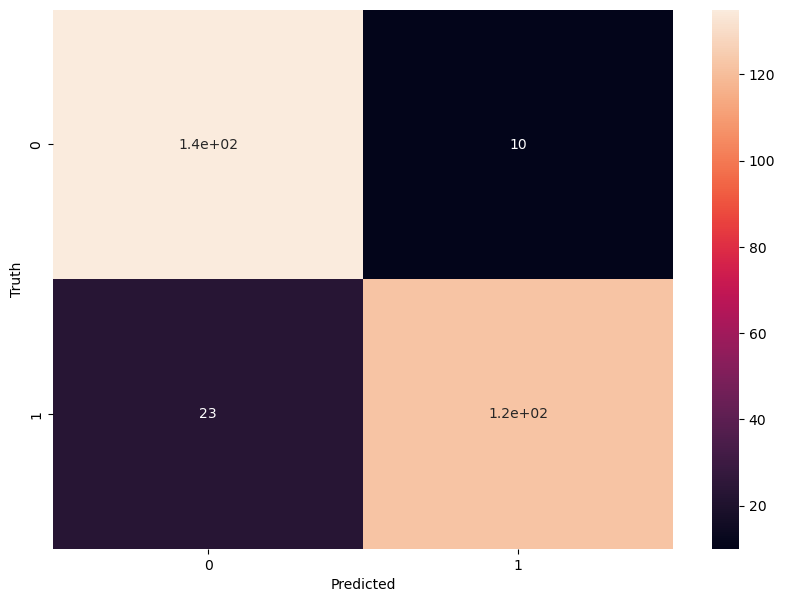

In [230]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [231]:
from sklearn.metrics import classification_report

clfr = RandomForestClassifier(n_estimators=100, random_state=0)
clfr.fit(x_train, y_train)

pr = clfr.predict(x_test)
print(classification_report(y_test, pr))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       145
           1       0.92      0.84      0.88       145

    accuracy                           0.89       290
   macro avg       0.89      0.89      0.89       290
weighted avg       0.89      0.89      0.89       290

